# 2008 Summer Olympics Medal Data Cleaning

In this notebook, I take a wide format dataset containing information on medalists from the 2008 Olympics and convert it to a tidier and more readable long format dataset from which I then create multiple data visualizations and draw insights.

The original dataset is in wide format, with each olympic event making up a separate column and the types of medals won scattered across them. This structure is messy because the values of variables themselves were stored as column headers, creating an enormous dataset with primarily null values that is almost impossible to extract insights from.

It is therefore essential to transform this into a tidy dataset. Tidy datasets are easy to work with, model and visualize, and have a specific structure: each variable is a column, each observation is a row, and each type of observational unit forms

By reshaping it into a tidy format where each variable (medalist_name, medal, gender, and sport) holds its own column, and each observation (medal won, or in this case medalist_name because the dataset only contained one medal per medalist) has its own row, were are left with a much more concise and readable table that can subsequently be used to generate insightful visualizations and tables.

# Setup

- First, I import the necessary libraries:
    - pandas: to load, clean, and work with the dataset
    - matplotlib.pyplot: to help with visualizations and labeling

- I then load in the 2008 Olympics dataset from the local folder using the read_csv function from pandas, and take a brief look at how the data is initially organized.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt  # For creating custom plots

# Load in the 2008 Olympics dataset from the CSV file.
df = pd.read_csv("olympics.csv")

# Take a quick look at how the data is currently organized
df

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,Éver Banega,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871,Ólafur Stefánsson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1872,Óscar Brayson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1873,Łukasz Pawłowski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Converting from Wide to Long Format

- In this case, the original data is in wide format, in which each row represents a 2008 Olympic medalist and each column represents an Olympic event and its gender, with the observational unit being what, if any, medal the Olympian obtained in that event.

- Instead, it would be better to condense the columns by creating new variables such that there was one column each for each event and medal obtained. The dataset therefore becomes long format, where each row represents one medal by one Olympian. This dataset only contains one medal per Olympian, so the medalists' names themselves can therefore serve as the unique observation/identifier.


In [78]:
# Initial melt to long format
# id_vars = "medalist_name" keeps the medalist_name column fixed as the identifier column
# var_name = "event" brings all of the other column headers into a new column
# value_name = "medal" brings all the medal values from the initial table into a new column
# We are thus left with 3 columns: "medalist_name", "event", and "medal"

df_melt = pd.melt(df, id_vars = ["medalist_name"], var_name = "event", value_name = "medal")

# This creates a lot of meaningless rows, because it creates a row for each medal that each Olympian could have possibly won
# We therefore must delete the rows where the value for medal is null
df_melt = df_melt.dropna(subset="medal")



# Cleaning Up Column Names

- The new "event" column contains multiple variables: gender and sport. To improve the readability of the dataset and improve our ability to conduct data analysis on it, we should split this column into two.
- I create the columns "gender" and "sport", which respectively contain the gender and sport information contained in the "event" variable.
- I do this using the str.split command, which creates two new columns by splitting each "event" at the "_", which comes between the gender and the sport. 



In [72]:
# Creating two new columns: gender and sport, which contain the respective gender and sport taken from the full event name
# expand = True splits the "event" column into two at the "_"
df_melt[["gender","sport"]] = df_melt["event"].str.split("_", expand = True)

# Dropping the "event" column which is now redundant with the gender and sport columns
df_final = df_melt.drop(columns="event")



# Data Visualizations

- I include 3 different data visualizations that look into certain measures and provide various insights.


### Visualization #1: Stacked Bar Chart illustrating the total medals won in each sport, broken down by type of medal

- I use the pandas crosstab function to create a stacked bar chart using the "sport" and "medal" columns.

- This allows us to:
    1. Understand which sports awarded the most medals
    2. Visualize whether there was an even distribution of bronze, silver, and gold medals awarded in each sport, or if this distribution varied for some

- Understandably, the chart shows that Athletics (i.e. track and field/running events) awarded the most medals. This makes sense due to the number and diversity of events within this sport.

- Rowing, swimming, association football (soccer), and field hockey follow in terms of number of medals awarded. This is also understandable as the majority of these are team sports in which every player receives a medal. And in the case of swimming, like track in field, there is such a wide range of events and relays that 100+ medals end up being awarded.

- Within the individual bars, the distribution of bronze, silver, and gold medals looks relatively equal. A pivot table in a further down section allows a more numbers-centered approach to understanding the extent of this.

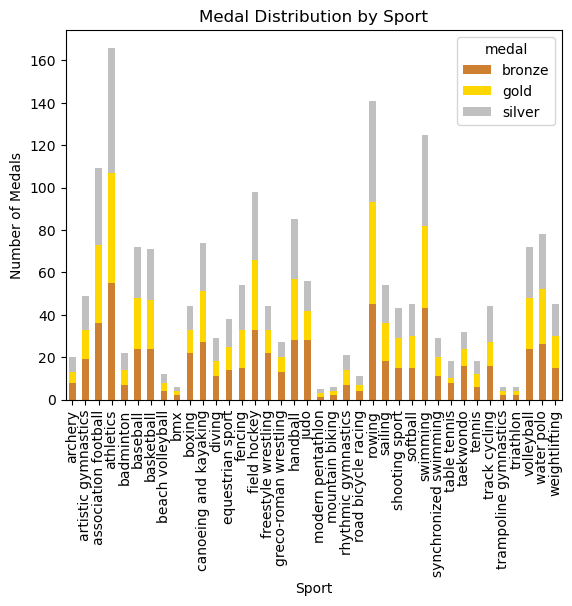

In [73]:
# I use the crosstab function to create a new table in which "sport" is the index making up each of the rows, and "medal" is the column, with there being one column for bronze, silver, and gold.
# I then just use plot to convert it to a bar chart and include the parameter stacked = True so that it creates a stacked bar chart.
# The plt functions are used to label the graph and axes and then display the visualization

pd.crosstab(df_final["sport"], df_final["medal"]).plot(kind = "bar", stacked=True, 
                                                       color = ["#CD7F32", "#FFD700", "#C0C0C0"]) #Note that here I manually input the colors in order for display purposes. This isn't done so dynamically, so if the order of the columns were to change, the colors would misalign.
plt.title("Medal Distribution by Sport")
plt.xlabel("Sport")
plt.ylabel("Number of Medals")
plt.show()

### Visualization #2: Bar Chart illustrating the distribution of medal type

- I create a simple bar chart that shows the total number of bronze, silver, and gold medals won.

- While intuitively, one would think that there should be an even distribution with 1 bronze, 1 silver, and 1 gold medal being awarded for each event.

- This graph shows that this is not the case, with there being significantly more bronze medals awarded than gold. 

- This could be due to multiple reasons:
    1. Some sports like boxing award 2 bronze medals and only 1 silver and 1 gold medal
    2. In team sports like soccer or basketball, there could possibly be slight variation in team sizes. Since each player on the team receives a medal, this could skew the totals.

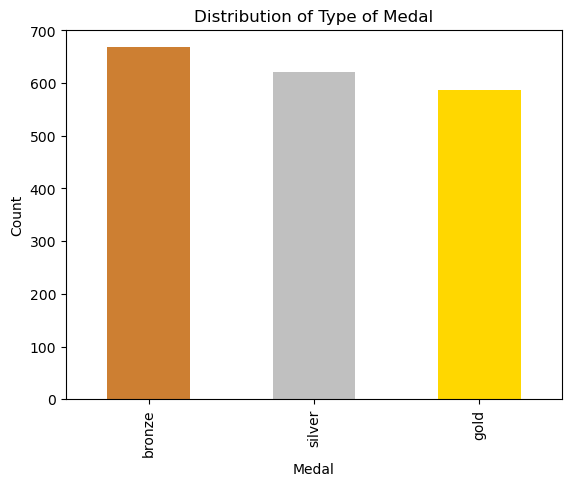

In [74]:
# I use value_counts to count the total number of each type of medal in the "medal" column. On its own, this would just display a table of the value counts by medal
# I use plot to convert the value_counts table to a bar chart
# The plt functions are used to label the graph and axes and then display the visualization


df_final["medal"].value_counts().plot(kind="bar", 
                                      color = ["#CD7F32", "#C0C0C0", "#FFD700"]) #Again, note that here I manually input the colors in order for display purposes. This isn't done so dynamically, so if the order of the columns were to change, the colors would misalign.
plt.title("Distribution of Type of Medal")
plt.xlabel("Medal")
plt.ylabel("Count")
plt.show()


### Visualization #3: Pie Chart illustrating the share of medals won by each gender

- I create a very simple pie chart that shows the basic breakdown of total medals won by gender.

- The resulting visual clearly illustrates that the majority of medals in the dataset were won by men. 

- I explore this further in the pivot tables below, but this graph ultimately does not reveal much other than the fact that men participated in more events than women did.

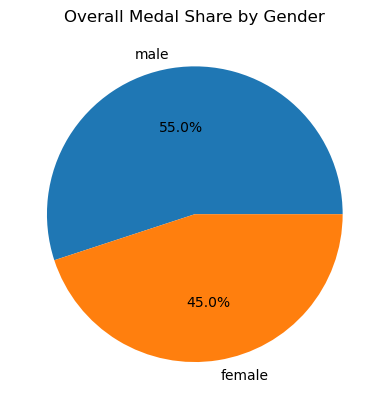

In [75]:
# I again use value_counts to count the number of each "gender" in the medal winner dataset. This is straightforward because the dataset only contains Olympians who won a medal.
# I use plot again to convert the value_counts table to a graph, but instead of kind = "bar", I use kind = "pie"
# I set the autopct parameter to %1.1f%%, meaning that the chart will be labeled in terms of percentages to 1 decimal place.
# The plt commands label the chart and display the visualization

df_final["gender"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title('Overall Medal Share by Gender')
plt.ylabel('') # otherwise it says "count" on the vertical "axis" which doesn't make any sense
plt.show()

# Aggregating the Data

- I create two pivot table to examine certain questions about the data.

### Pivot Table #1: Distribution of Medal Type by Sport

- This pivot table shows the number of each type of medal won in each olympic sport. It is essentially a table version of Visualization #1.

- It is particularly useful in identifying the sports in which there is an imbalance between the number of bronze, silver, and gold medals awarded.

- Medals in sports like volleyball, weightlifting, and baseball are exactly evenly distributed, with many others being almost exact.

- For some, there is a clear systematic difference in distribution. For boxing, judo, freestyle wrestling, and Greco-Roman wrestling, there are twice as many bronze medals awarded as silver or gold ones. This is due to these sports awarding two bronze medals per event as they do not have a third place match.

- This simply requires creating a pivot table where medalist_name is the value, "sport" is the index (i.e. rows), and each "medal" type is a column, and using the aggfunct "count" to count the number of medal winners for each sport and medal type.

In [76]:
print("Medal Type Distribution by Sport:")

# Here, I simply use the pivot_table function where "medalist_name" is the value,  "sport" is the index (rows), and the "medal" types are the columns. This is similar to the setup of the crosstab function in Visualizaiton #1.
# The aggfunc = "count" means I want the aggregation function to count the number of medalists for each entry (sport/medal combination) in the table.

pivot_1 = pd.pivot_table(df_final, values = "medalist_name", index = "sport", columns = "medal", aggfunc = "count")
print(pivot_1)



Medal Type Distribution by Sport:
medal                  bronze  gold  silver
sport                                      
archery                     8     5       7
artistic gymnastics        19    14      16
association football       36    37      36
athletics                  55    52      59
badminton                   7     7       8
baseball                   24    24      24
basketball                 24    23      24
beach volleyball            4     4       4
bmx                         2     2       2
boxing                     22    11      11
canoeing and kayaking      27    24      23
diving                     11     7      11
equestrian sport           14    11      13
fencing                    15    18      21
field hockey               33    33      32
freestyle wrestling        22    11      11
greco-roman wrestling      13     7       7
handball                   28    29      28
judo                       28    14      14
modern pentathlon           1     2       

### Pivot Table #2: Total Medals by Gender and Sport

- This pivot table can help to shed light on what may be behind the discrepancy between male and female medal winners as illustrated in Visualization #3.

- Here, I again use "medalist_name" as the values and "sport" as the index, but this time use "gender" as the columns. 

- I again use the aggfunc "count" to count the number of medal winners by sport for each gender.

- The results reveal that several sports, including baseball, boxing, and Greco-Roman wrestling have have no female medalists. This is of course due to the fact that women did not compete in these sports in the Olympics.

- On the other hand, some sports, including softball, synchronized swimming, and rhythmic gymnastics, have no male medalists. This indicates that men did not compete in these sports in the Olympics.

- Upon closer analysis, certain sports in which both female and male athletes competed possess significant discrepancies in medals awarded. Canoeing and kayaking, freestyle wrestling, and rowing all awarded significantly more medals to males. This suggests that for men, there were more events, weight-classes, or competitions within these sports that thus resulted in more medals being awarded.

In [77]:
print("Total Medals by Gender and Sport:")

pivot_2 = pd.pivot_table(df_final, values = "medalist_name", index = "sport", columns = "gender", aggfunc = "count", fill_value=0)
print(pivot_2)

Total Medals by Gender and Sport:
gender                 female  male
sport                              
archery                     9    11
artistic gymnastics        20    29
association football       54    55
athletics                  81    85
badminton                  10    12
baseball                    0    72
basketball                 36    35
beach volleyball            6     6
bmx                         3     3
boxing                      0    44
canoeing and kayaking      21    53
diving                     13    16
equestrian sport           20    18
fencing                    26    28
field hockey               48    50
freestyle wrestling        16    28
greco-roman wrestling       0    27
handball                   42    43
judo                       28    28
modern pentathlon           2     3
mountain biking             3     3
rhythmic gymnastics        21     0
road bicycle racing         6     5
rowing                     58    83
sailing                    21 